# Introduction to Data Science – Final Submission
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 7 2025, 11:59pm.

In this project report we will mention basic information about the members, background and motivation for choosing the direction of the project, setting the project objectives, asking the main questions and setting learning objectives, performing data description and acquisition, ethical considerations and potential harms of the direction, performing data cleaning and processing then exploratory analysis including the analytical methods used, and finally developing a timeline for the group project.


# Project Title: Microeconomic Analysis of Wheat Pricing and Market Behavior in Kansas: Exploring Local Agricultural Trends

## Team Members:
NAME(EMAIL, UID)
- **YUYANG YAO** (<u1400651@umail.utah.edu>, u1400651)
- **NICLAS SCOTT HOLMAN** (<u1281501@umail.utah.edu>, u1281501)
- **WEITONG NIU** (<u1345736@umail.utah.edu>, u1345736)

## Background and Motivation

The motivation for this project arises from the ongoing importance of wheat as a staple agricultural commodity, particularly in local markets such as Kansas. Numerous factors, including production levels, supply chain issues, weather, export-import dynamics, and local consumption patterns, influence wheat pricing. As wheat production plays a crucial role in Kansas state's local crop economies, understanding the microeconomic factors behind its pricing and market behavior is critical for optimizing and efficient decision-making by local farmers, policymakers, and businesses like demand, supply, equilibrium price, and quantity trend forecast. 

Our team is interested in understanding how local factors, such as environmental and weather conditions, Market Structure (wheat should ), production efficiency (technology ex), and trade policies (tariffs and tax ex), affect wheat prices in Kansas (we may only focus on a few of them). In recent years, fluctuations in agricultural commodity prices have led to significant economic consequences for both producers and consumers in the region. By exploring these local dynamics, we will strive to provide valuable insights that could help mitigate risks associated with price volatility and optimize agricultural practices in the region. We are also interested in the seasonal trend of the price of wheat.

Through this analysis, we hope to contribute to a broader understanding of the agricultural markets in Kansas (ex-test if the model fits more generally), which can potentially be applied to other regions with similar economic and agricultural structures. Furthermore, this study aligns with current trends in using microeconomic theory to analyze agricultural markets and predict future market behaviors, particularly in the context of policy changes or shifts in production patterns due to supply and demand shifts together with elasticity and so on.

## Project Objectives

- **Primary Questions**:
  - How do local factors, such as production levels and stocks, weather factors including rainfall and temperature, imports, and exports, influence wheat prices in Kansas? How are these variables correlated?
  - What are the key determinants of wheat supply and demand in Kansas's wheat market? I.e. except for sales and production, what other factors matter to my model?
  - Can we identify significant trends in wheat pricing and market behavior based on historical data?
  - How do we interpolate or adjust annual production data to obtain monthly or seasonal production data to match prices (Most reports and data are annual)?
   - How to do the missing sales in 2024 or other data influence the trend in regression? How to fix it?

- **Learning Objectives**:
  - Develop expertise in applying microeconomic concepts, such as supply (supply shock) and demand estimation models, market equilibrium distributions (maybe parametric or nonparametric), and price elasticity, to an agricultural market context.
  - Gain experience in working with time series data :(optional: Brownian motion (BM) (need to decompose, helpful for price volatility as diffusion matrix), exponential smoothing, ARIMA, including understanding seasonal trends and their impact on pricing to provide the approximate distribution type for regression (hopefully linear) and visualization.
  - Understand the role of local market dynamics within broader national and global agricultural trade systems (especially Kansas, which has the highest wheat production in the United States).
  - Learn how to conduct data cleaning and preparation (including quarterly stock info, not montly), do exploratory analysis, and develop forecasting models using historical agricultural data.
  - more details in the analysis part

## Data Description and Acquisition (df_kansasdata_1_copy_1 except stock)

- **Data Format**: The data will be in CSV format (tabular format), which includes data on wheat production (annually and avg to monthly df), consumption measured in sales, stocks, temperature, and rainfall... (exports, imports not ready yet).
- **Size**: The dataset (df_kansasdata_1) and other separate data consist of several columns of factors of price from the 2015-2025 Jan. Each row has data on wheat sales, prices for the USA and Kansas state,  temperature, and rainfall, some geographical info, as well as possible missing values 
- **Attributes**: The datasets (df_kansasdata_1) include the following key features combined from separate svc files:
  - There are several 'Year', one'Period', and 'Date' columns for clarity, two weather attributes, and three price attributes, import, and export. 
  - some features and geographical attributes of the data, including State (all Kansas), commodity (target crops) wheat, some units info like Data item column (price in IN $/BU)
  - Price_Kansas_monthly is the monthly average price from Kansas State, Price_usa_monthly is the national monthly price level. Also usa monyly price,and Price_corn_monthly.
  -And other factors of price trend, including two other factors, rainfall (Rainfall_kansas) and average monthly temperature of Kansas state (Avg_Tem_k)
  - sales_PCT is: Measured in **PCT of Mktg Year**, i.e., wheat sales as a percentage of the sales year, indicating seasonal patterns.
  - Sales_Kansas_monthly_approx=..(scale by 1000,000)
  - annual production (s per 1000,000 bushel) (scale by 1000,000)
  - avg_production (scale by 1000,000)
  -  stock separately
  - Import export: Values in Thousands of dollars
  - will add more data as factors for price trends, etc.
  
- **Source**: The price and most attributes data are publicly available from the USDA NASS (National Agricultural Statistics Service), Economic Research Service. We will download the data from the USDA NASS's Quick Stat (brief monthly) :  [https://quickstats.nass.usda.gov/#321D38A0-B848-3BF5-AA16-C8ABE7613D32]. Tem and rain data for Kansas: [https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/statewide/time-series/14/tavg/1/0/2015-2025]. For more sites that may need to collect data in the future, we ensure that data will be collected for research purposes in accordance with the terms of service of the scraping site and the restrictions set out in the robots.txt file, and that we do not spam or sell personal information (most, if not all, of the data we scrape is publicly available).
  
  



## Data Cleaning and Processing

We anticipate several data-cleaning tasks, including:
- Handling missing values and unmatched index: Date attributes need to be handled. Some rows may have missing values after matching the date and incomplete data (especially in production for supply and stock as quarterly data). Plan to add annual production evenly for each month and may add random erros & seasonal trends from other reports (like in USDA) initially. After forecasting supply, we will adjust it more accurately by predicting value from regression, for example. We plan to impute missing values using the average of (mean of the corresponding month from previous years and the mean of the corresponding year's sales) (done)
- Ensuring consistent formatting: The dataset may have inconsistent units (e.g., tons vs. bushels) and inconsistent dates. We will standardize units across all observations and match the date like using (1) reverse the order of the dates (2) .groupby and order month. Observed all are good up till now.
- Aggregating data: We may need to aggregate quarterly data or monthly to yearly summaries to simplify analysis and remove noise from seasonal fluctuations (actually, I can download all annual data for 100 years, but may adjust by price inflation and other effects). (aggregate in heatmap)
- Adding more price factors' data to the df_kansasdata_1_copy_1.
Additionally, we plan to create new features such as (not done yet, will be finished in analysis of mkt dynamics):
- Adjusted production values (taking into account inflation or market conditions) after time series analysis and/ or regression
- price elasticity of demand by definition (percentage change in quantity-demanded (sales)/ percentage change in price)
- Maybe add marginal quantities like marginal product
- Price indices are based on supply-demand relationships in the dataset (there are indices summaries from the national level).
- Note that the price trend may be similar to the national level, considering the high production of Kansas, but the supply and demand are estimated locally. https://www.nass.usda.gov/Quick_Stats/Lite/result.php?35CB4797-7F2C-3203-912F-B769E7867F50 production2

Example:
Aggregate by marketing year
data['MarketingYear'] = data['MarketingYear'].astype(str)
yearly_data = data.groupby(['MarketingYear', 'Class']).sum()
yearly_data.head()

In [36]:
from prophet import Prophet

from bs4 import BeautifulSoup
import urllib.request

import pandas as pd
import scipy as sc
import numpy as np
import urllib.request

import statsmodels.formula.api as sm
from scipy.stats import lognorm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

df_what_price_usa_recently=pd.read_csv('what_price_usa_recently.csv', encoding='utf-8')
df_what_price_usa_recently.rename(columns={"Value": "Price_usa_monthly"}, inplace=True)
print(df_what_price_usa_recently.info())
#df_what_price_usa_recently.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Program            302 non-null    object 
 1   Year               302 non-null    int64  
 2   Period             302 non-null    object 
 3   Week Ending        0 non-null      float64
 4   Geo Level          302 non-null    object 
 5   State              302 non-null    object 
 6   State ANSI         0 non-null      float64
 7   Ag District        0 non-null      float64
 8   Ag District Code   0 non-null      float64
 9   County             0 non-null      float64
 10  County ANSI        0 non-null      float64
 11  Zip Code           0 non-null      float64
 12  Region             0 non-null      float64
 13  watershed_code     302 non-null    int64  
 14  Watershed          0 non-null      float64
 15  Commodity          302 non-null    object 
 16  Data Item          302 non

In [37]:

df_wheat_price_kansas_1 = pd.read_csv('wheat price kansas.csv', encoding='utf-8')
df_wheat_price_kansas_1.rename(columns={"Value": "Price_Kansas_monthly"}, inplace=True)
print(df_wheat_price_kansas_1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Program               302 non-null    object 
 1   Year                  302 non-null    int64  
 2   Period                302 non-null    object 
 3   Week Ending           0 non-null      float64
 4   Geo Level             302 non-null    object 
 5   State                 302 non-null    object 
 6   State ANSI            302 non-null    int64  
 7   Ag District           0 non-null      float64
 8   Ag District Code      0 non-null      float64
 9   County                0 non-null      float64
 10  County ANSI           0 non-null      float64
 11  Zip Code              0 non-null      float64
 12  Region                0 non-null      float64
 13  watershed_code        302 non-null    int64  
 14  Watershed             0 non-null      float64
 15  Commodity             3

In [38]:
df_corn_price_kansas_1 = pd.read_csv('corn price kansas monthly.csv', encoding='utf-8')
df_corn_price_kansas_1.rename(columns={"Value": "Price_corn_monthly"}, inplace=True)

In [39]:

#plt.plot(df_wheat_price_kansas_1.index, df_wheat_price_kansas_1["Price_Kansas_monthly"], color="blue")# I didn't chnage x to be moth yet
#plt.show()# note that the two price patterns are similar due to Kansas's leading wheat production in the usa


In [40]:
#make df fit for prophet
df_wheat_price_kansas_1_copy=df_wheat_price_kansas_1
month_l_order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_wheat_price_kansas_1_copy=df_wheat_price_kansas_1_copy.sort_values(by='Period',key=lambda x: pd.Categorical(x, 
            categories=month_l_order, ordered=True))# sorty by column 'Period'. key is a function needs to apply to period column,(The key argument modifies sorting behavior.)
#swap each value x o be pd.Categorical... 

#https://www.w3schools.com/python/pandas/ref_df_sort_values.asp | for sort_values 
#https://www.geeksforgeeks.org/python-pandas-categorical/ |for pd.Categorical
df_wheat_price_kansas_1_copy = df_wheat_price_kansas_1_copy.groupby('Year').apply(lambda group: group)# (remain above month_sorting sequence)
df_wheat_price_kansas_1_copy.reset_index(drop=True, inplace=True)# removes the extra indexing 2015,..,2025
#df_wheat_price_kansas_1_copy.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2752\2105230964.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_wheat_price_kansas_1_copy = df_wheat_price_kansas_1_copy.groupby('Year').apply(lambda group: group)# (remain above month_sorting sequence)


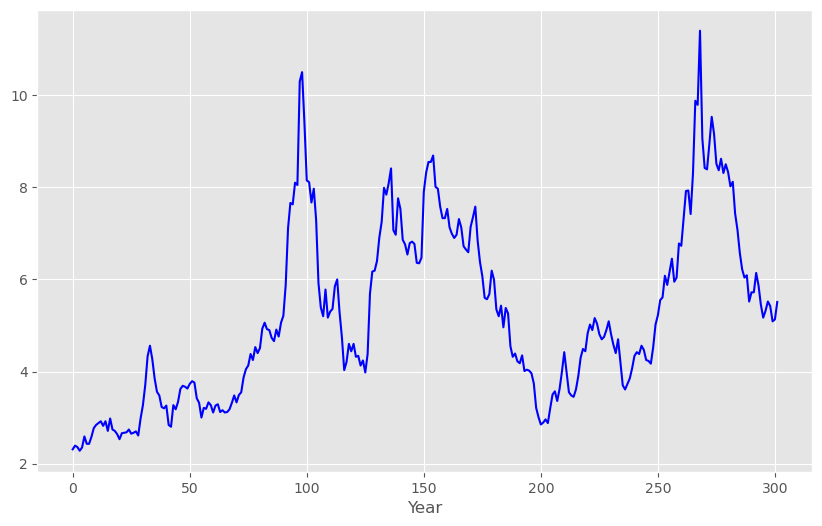

In [41]:
plt.plot(df_wheat_price_kansas_1_copy.index, df_wheat_price_kansas_1_copy["Price_Kansas_monthly"], color="blue")
# 
plt.xlabel("Year")
plt.show()

In [42]:
df_corn_price_kansas_1_copy=df_corn_price_kansas_1 
#month_l_order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_corn_price_kansas_1_copy=df_corn_price_kansas_1_copy.sort_values(by='Period',key=lambda x: pd.Categorical(x, 
            categories=month_l_order, ordered=True))# sorty by column 'Period'. key is a function needs to apply to period column. swap each value x o be pd.Categorical... 
#https://www.w3schools.com/python/pandas/ref_df_sort_values.asp | for sort_values 
#https://www.geeksforgeeks.org/python-pandas-categorical/ |for pd.Categorical
df_corn_price_kansas_1_copy = df_corn_price_kansas_1_copy.groupby('Year').apply(lambda group: group)
df_corn_price_kansas_1_copy.reset_index(drop=True, inplace=True)# removes the extra indexing 2015,..,2025
#df_corn_price_kansas_1_copy.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2752\1187337512.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_corn_price_kansas_1_copy = df_corn_price_kansas_1_copy.groupby('Year').apply(lambda group: group)


In [43]:
df_what_price_usa_recently_copy=df_what_price_usa_recently
#month_l_order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_what_price_usa_recently_copy=df_what_price_usa_recently_copy.sort_values(by='Period',key=lambda x: pd.Categorical(x, 
            categories=month_l_order, ordered=True))# sorty by column 'Period'. key is a function needs to apply to period column. swap each value x o be pd.Categorical... 
#https://www.w3schools.com/python/pandas/ref_df_sort_values.asp | for sort_values 
#https://www.geeksforgeeks.org/python-pandas-categorical/ |for pd.Categorical
df_what_price_usa_recently_copy = df_what_price_usa_recently_copy.groupby('Year').apply(lambda group: group)
df_what_price_usa_recently_copy.reset_index(drop=True, inplace=True)# removes the extra indexing 2015,..,2025
#df_what_price_usa_recently_copy.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2752\2058955653.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_what_price_usa_recently_copy = df_what_price_usa_recently_copy.groupby('Year').apply(lambda group: group)


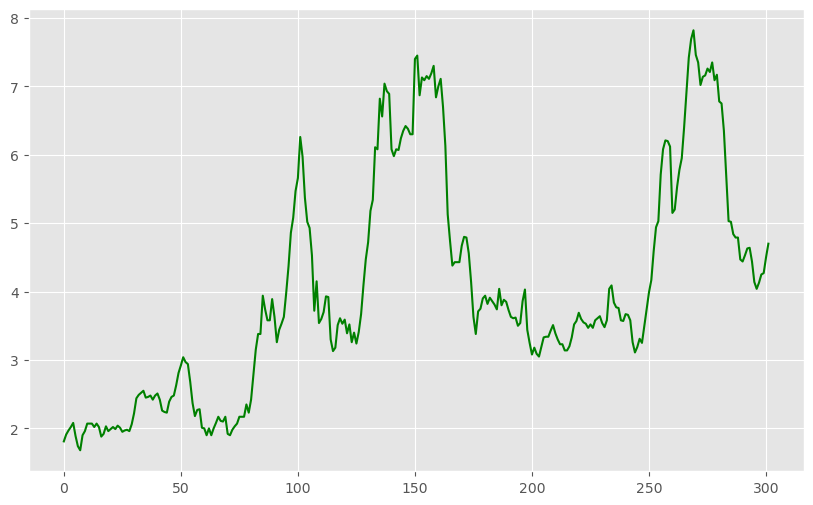

In [44]:
plt.plot(df_corn_price_kansas_1_copy.index, df_corn_price_kansas_1_copy["Price_corn_monthly"], color='green')
# pattern similar to wheat
plt.show()

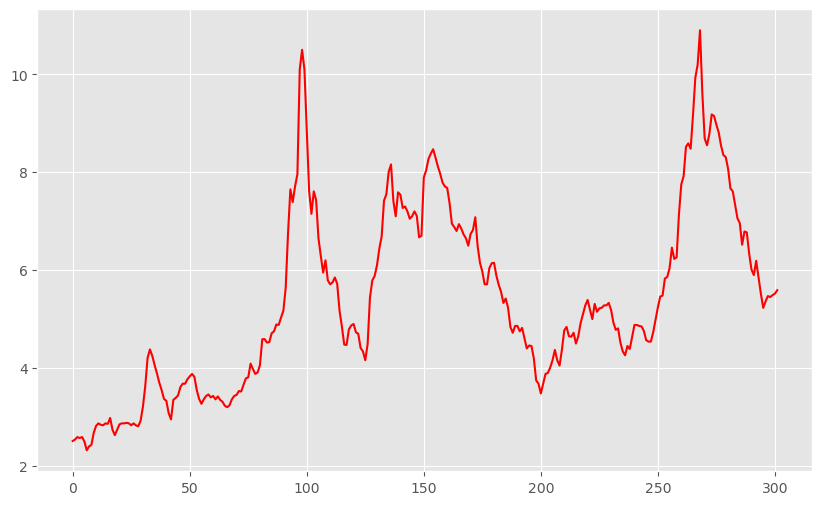

In [45]:
plt.plot(df_what_price_usa_recently_copy.index, df_what_price_usa_recently_copy["Price_usa_monthly"], color='red') # I didn't chnage x to be moth yet
plt.show()

the overall pattern looks similar to Kansas wheat price as the leading production of wheat in Kansas.

In [46]:
df_rain_k=pd.read_csv('kansas_rainfall.csv', skiprows=3,  encoding='utf-8')# skip first 3 rows
df_avg_temp_k=pd.read_csv('average tem Kansas.csv', skiprows=3, encoding='utf-8')
df_climate_k=pd.concat([df_rain_k, df_avg_temp_k], axis=1)
df_climate_k.columns = ["Date", "Rainfall_Kansas", 'Date2',"Avg_Tem_k"]
df_climate_k=df_climate_k[["Date", "Rainfall_Kansas", "Avg_Tem_k"]]
df_climate_k.reset_index(inplace=True)
df_climate_k.drop("index", axis=1, inplace=True)

print(df_climate_k.info())
#df_climate_k
# add types of data, and how it influences the price, Q_s and Q_d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             301 non-null    int64  
 1   Rainfall_Kansas  301 non-null    float64
 2   Avg_Tem_k        301 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 7.2 KB
None


In [47]:
df_sales_k_1=pd.read_csv('wheat total sales Kansas.csv', encoding='utf-8') #Wheat sales as a percentage of the sales year,
#indicating seasonal patterns 
df_sales_k_1.rename(columns={"Value": "Sales_Kansas_monthly", 'Year': 'Year_sale', 'Period':'Period_sale'}, inplace=True)
#print(df_sales_k_1.info())
#df_sales_k_1.head()#issing vlaues

df_sales_k_1_copy=df_sales_k_1
#month_l_order=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_sales_k_1_copy=df_sales_k_1_copy.sort_values(by='Period_sale',key=lambda x: pd.Categorical(x, 
            categories=month_l_order, ordered=True))# sorty by column 'Period'. key is a function needs to apply to period column. swap each value x o be pd.Categorical... 
#https://www.w3schools.com/python/pandas/ref_df_sort_values.asp | for sort_values 
#https://www.geeksforgeeks.org/python-pandas-categorical/ |for pd.Categorical
df_sales_k_1_copy = df_sales_k_1_copy.groupby('Year_sale').apply(lambda group: group)
df_sales_k_1_copy.reset_index(drop=True, inplace=True)
print(len(df_sales_k_1_copy['Sales_Kansas_monthly']))
df_sales_k_1_copy.tail()
#missing 8 values

264


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2752\641518629.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sales_k_1_copy = df_sales_k_1_copy.groupby('Year_sale').apply(lambda group: group)


,Program,Year_sale,Period_sale,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Sales_Kansas_monthly,CV (%)
259,SURVEY,2024,JAN,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,4,NaN
260,SURVEY,2024,FEB,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,4,NaN
261,SURVEY,2024,MAR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,4,NaN
262,SURVEY,2024,APR,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,6,NaN
263,SURVEY,2024,MAY,NaN,STATE,KANSAS,20,NaN,NaN,NaN,...,NaN,NaN,0,NaN,WHEAT,"WHEAT - SALES, MEASURED IN PCT OF MKTG YEAR",TOTAL,NOT SPECIFIED,6,NaN


In [48]:
date_l_range = pd.date_range(start='2000-01-01', end='2025-01-01', freq='MS')
df_kansasdata_1=pd.DataFrame({'Time_plot': date_l_range})
df_kansasdata_1=pd.concat([df_kansasdata_1,df_wheat_price_kansas_1_copy,df_what_price_usa_recently_copy["Price_usa_monthly"]],axis=1)
df_kansasdata_1=pd.concat([df_kansasdata_1, df_corn_price_kansas_1_copy['Price_corn_monthly']],axis=1)
df_kansasdata_1=pd.concat([df_kansasdata_1, df_climate_k],axis=1)
df_kansasdata_1=df_kansasdata_1[['Time_plot','Year','Period','State','Commodity','Data Item','Price_Kansas_monthly','Price_usa_monthly','Price_corn_monthly','Date','Rainfall_Kansas','Avg_Tem_k']]#CV??
df_kansasdata_1 = df_kansasdata_1[(df_kansasdata_1['Year'] != 2000) & (df_kansasdata_1['Year'] != 2001)]# starting from 2002
df_kansasdata_1 = df_kansasdata_1.iloc[5:].reset_index(drop=True)

#df_kansasdata_1.head()

In [49]:
df_kansasdata_1=pd.concat([df_kansasdata_1, df_sales_k_1_copy[['Year_sale', 'Period_sale','Sales_Kansas_monthly']]],axis=1)
df_kansasdata_1['Rainfall_Kansas'] = df_kansasdata_1['Rainfall_Kansas'].astype(float)
df_kansasdata_1['Avg_Tem_k'] = df_kansasdata_1['Avg_Tem_k'].astype(float)
df_kansasdata_1 = df_kansasdata_1.iloc[:-1]# drop last row
df_kansasdata_1['Date'] = df_kansasdata_1['Date'].astype(int)
#print(df_kansasdata_1.info())


In [50]:
df_kansasdata_1

,Time_plot,Year,Period,State,Commodity,Data Item,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Period_sale,Sales_Kansas_monthly
0,2002-06-01,2002,JUN,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",2.98,2.92,2.06,200206,2.74,76.9,2002.0,JUN,28.0
1,2002-07-01,2002,JUL,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.27,3.21,2.22,200207,1.72,80.7,2002.0,JUL,28.0
2,2002-08-01,2002,AUG,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.71,3.63,2.44,200208,3.09,78.4,2002.0,AUG,12.0
3,2002-09-01,2002,SEP,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.33,4.21,2.49,200209,1.50,70.4,2002.0,SEP,6.0
4,2002-10-01,2002,OCT,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.56,4.38,2.52,200210,4.43,50.5,2002.0,OCT,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2024-09-01,2024,SEP,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.32,5.36,4.04,202409,1.62,71.1,NaN,NaN,NaN
268,2024-10-01,2024,OCT,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.52,5.47,4.13,202410,0.91,62.4,NaN,NaN,NaN
269,2024-11-01,2024,NOV,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.42,5.45,4.25,202411,4.36,46.3,NaN,NaN,NaN
270,2024-12-01,2024,DEC,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.09,5.49,4.27,202412,0.19,38.0,NaN,NaN,NaN


In [51]:
# add avg sale data
mask1=df_kansasdata_1['Sales_Kansas_monthly']>0
len_sale=mask1.sum()  # Caculate True values in the mask
#print(len_sale)
for i in range (len_sale, len(mask1)):
    month_i=df_kansasdata_1.loc[i, 'Period']
    df_kansasdata_1.loc[i, 'Sales_Kansas_monthly'] = df_kansasdata_1.groupby("Period_sale")['Sales_Kansas_monthly'].mean()[month_i]
#print(df_kansasdata_1.info())
#df_kansasdata_1.tail()

In [52]:
df_import=pd.read_csv('US_Import_cleaned.csv', encoding='utf-8') 
#df_import.info()
df_export=pd.read_csv('US_Export_cleaned.csv', encoding='utf-8') 
#df_export.info()
df_kansasdata_1=pd.concat([df_kansasdata_1, df_import['Import_usa_monthly']],axis=1)
df_kansasdata_1=pd.concat([df_kansasdata_1, df_export['Export_usa_monthly']],axis=1)
print(df_kansasdata_1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Time_plot             272 non-null    datetime64[ns]
 1   Year                  272 non-null    int64         
 2   Period                272 non-null    object        
 3   State                 272 non-null    object        
 4   Commodity             272 non-null    object        
 5   Data Item             272 non-null    object        
 6   Price_Kansas_monthly  272 non-null    float64       
 7   Price_usa_monthly     272 non-null    float64       
 8   Price_corn_monthly    272 non-null    float64       
 9   Date                  272 non-null    int32         
 10  Rainfall_Kansas       272 non-null    float64       
 11  Avg_Tem_k             272 non-null    float64       
 12  Year_sale             264 non-null    float64       
 13  Period_sale         

In [53]:
df_production_only_k_1=pd.read_csv('wheat production kansas anual.csv', encoding='utf-8') #anual not monthly
#print(df_production_k_1.info())
df_production_only_k_1['Value']=df_production_only_k_1['Value'].str.replace(',', '').astype(int)
df_production_only_k_1['Avg_annual_production_kansas']=df_production_only_k_1['Value']/12
df_production_only_k_1 = df_production_only_k_1.sort_values(by='Year', ascending=True)
df_production_only_k_1.head()
df_production_only_k_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 25 to 0
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Program                       26 non-null     object 
 1   Year                          26 non-null     int64  
 2   Period                        26 non-null     object 
 3   Week Ending                   0 non-null      float64
 4   Geo Level                     26 non-null     object 
 5   State                         26 non-null     object 
 6   State ANSI                    26 non-null     int64  
 7   Ag District                   0 non-null      float64
 8   Ag District Code              0 non-null      float64
 9   County                        0 non-null      float64
 10  County ANSI                   0 non-null      float64
 11  Zip Code                      0 non-null      float64
 12  Region                        0 non-null      float64
 13  watershed_co

In [54]:
#ruel: Jan-May use previous years' production beacuse not harvest, then Jun-dec use this yeas' avg prodcution
# Set the index to 'Year' for faster lookups
df_production_only_k_1 = df_production_only_k_1.set_index('Year')

for i in range(len(df_kansasdata_1)):
    year = df_kansasdata_1.loc[i, 'Year']
    month = df_kansasdata_1.loc[i, 'Period']
    
    # Get current year production
    if year in df_production_only_k_1.index:
        avg_production_current_y = df_production_only_k_1.loc[year, 'Avg_annual_production_kansas']
        annual_production_current_y = df_production_only_k_1.loc[year, 'Value']
    else:
        avg_production_current_y = annual_production_current_y = None  # Handle missing years

    # Get previous year production
    if (year - 1) in df_production_only_k_1.index:
        avg_production_previous_y = df_production_only_k_1.loc[year - 1, 'Avg_annual_production_kansas']
        annual_production_previous_y = df_production_only_k_1.loc[year - 1, 'Value']
    else:
        avg_production_previous_y = avg_production_current_y
        annual_production_previous_y = annual_production_current_y

    # Assign values based on the month
    if month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY']:
        df_kansasdata_1.loc[i, 'Avg_Production'] = avg_production_previous_y
        df_kansasdata_1.loc[i, 'Annual_Production'] = annual_production_previous_y
    else:
        df_kansasdata_1.loc[i, 'Avg_Production'] = avg_production_current_y
        df_kansasdata_1.loc[i, 'Annual_Production'] = annual_production_current_y
        
#df_kansasdata_1 = df_kansasdata_1.drop(columns=['Annual Production'])# I do not know why there is one more column



df_kansasdata_1.head()

,Time_plot,Year,Period,State,Commodity,Data Item,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Period_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production,Annual_Production
0,2002-06-01,2002,JUN,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",2.98,2.92,2.06,200206,2.74,76.9,2002.0,JUN,28.0,24572.0,220005.0,22550000.0,270600000.0
1,2002-07-01,2002,JUL,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.27,3.21,2.22,200207,1.72,80.7,2002.0,JUL,28.0,28703.0,292274.0,22550000.0,270600000.0
2,2002-08-01,2002,AUG,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.71,3.63,2.44,200208,3.09,78.4,2002.0,AUG,12.0,20148.0,381475.0,22550000.0,270600000.0
3,2002-09-01,2002,SEP,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.33,4.21,2.49,200209,1.50,70.4,2002.0,SEP,6.0,29075.0,317859.0,22550000.0,270600000.0
4,2002-10-01,2002,OCT,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.56,4.38,2.52,200210,4.43,50.5,2002.0,OCT,4.0,17948.0,364896.0,22550000.0,270600000.0


In [55]:
df_production_usa_1=pd.read_csv('wheat usa production total.csv', encoding='utf-8')
#df_production_usa_1['Value']=df_production_usa_1['Value'].str.replace(',', '').astype(int)
#df_production_usa_1['Avg_annual_production_usa']=df_production_usa_1['Value']/12
#df_production_usa_1 = df_production_usa_1.sort_values(by='Year', ascending=True)
#df_production_usa_1.head()

In [56]:
# approximate sales in bushes not PCT
df_kansasdata_1['Sales_Kansas_monthly_approx']=(df_kansasdata_1['Sales_Kansas_monthly']/100)*(df_kansasdata_1['Annual_Production'])
df_kansasdata_1.head()                                                                                                     

,Time_plot,Year,Period,State,Commodity,Data Item,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,Rainfall_Kansas,Avg_Tem_k,Year_sale,Period_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production,Annual_Production,Sales_Kansas_monthly_approx
0,2002-06-01,2002,JUN,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",2.98,2.92,2.06,200206,2.74,76.9,2002.0,JUN,28.0,24572.0,220005.0,22550000.0,270600000.0,75768000.0
1,2002-07-01,2002,JUL,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.27,3.21,2.22,200207,1.72,80.7,2002.0,JUL,28.0,28703.0,292274.0,22550000.0,270600000.0,75768000.0
2,2002-08-01,2002,AUG,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.71,3.63,2.44,200208,3.09,78.4,2002.0,AUG,12.0,20148.0,381475.0,22550000.0,270600000.0,32472000.0
3,2002-09-01,2002,SEP,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.33,4.21,2.49,200209,1.50,70.4,2002.0,SEP,6.0,29075.0,317859.0,22550000.0,270600000.0,16236000.0
4,2002-10-01,2002,OCT,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.56,4.38,2.52,200210,4.43,50.5,2002.0,OCT,4.0,17948.0,364896.0,22550000.0,270600000.0,10824000.0


In [57]:
df_kansasdata_1['Sales_Kansas_monthly_approx']=df_kansasdata_1['Sales_Kansas_monthly_approx']/1000000
df_kansasdata_1['Avg_Production']=df_kansasdata_1['Avg_Production']/1000000
df_kansasdata_1['Avg_Production']=df_kansasdata_1['Avg_Production']/1000000
df_kansasdata_1['Annual_Production']=df_kansasdata_1['Annual_Production']/1000000


In [58]:
import numpy as np
# price elasticity using midpoint method (Econ 4010)

# fake data
price_f = np.array([100, 105, 110, 115, 120])  # Example prices
sales_f = np.array([200, 180, 160, 140, 120])  # Example sales

# Calculate percentage change using midpoint method
price_change_f = np.concatenate(([0.001],(price_f[1:] - price_f[:-1]) / ((price_f[1:] + price_f[:-1]) / 2)))
sales_change_f = np.concatenate(([0.001],(sales_f[1:] - sales_f[:-1]) / ((sales_f[1:] + sales_f[:-1]) / 2)))
#price_change = np.append(price_change, 0.0001)# add a tiny amount to 0
#sales_change=np.append(sales_change,0.000000001)
# Calculate price elasticity of demand (midpoint method)
price_elasticity_f = sales_change_f / price_change_f

print("Price Elasticity of Demand:", price_elasticity_f, price_change_f,sales_change_f)


Price Elasticity of Demand: [ 1.         -2.15789474 -2.52941176 -3.         -3.61538462] [0.001      0.04878049 0.04651163 0.04444444 0.04255319] [ 0.001      -0.10526316 -0.11764706 -0.13333333 -0.15384615]


In [59]:
epsilon_1 = 0.001# prvent divide by 0 for price change
price=df_kansasdata_1['Price_Kansas_monthly'].tolist()
price=np.array(price)# convert to array for / vector
sales=df_kansasdata_1['Sales_Kansas_monthly_approx'].tolist()
sales=np.array(sales)
price_change_PCT = np.concatenate(([0.0116],(price[1:] - price[:-1]) / ((price[1:] + price[:-1]) / 2)))
sales_change_PCT = np.concatenate(([0.04],(sales[1:] - sales[:-1]) / ((sales[1:] +sales[:-1]) / 2)))
#price_change = np.append(price_change, 0.0001)# add a tiny amount to 0
#sales_change=np.append(sales_change,0.000000001)
# Calculate price elasticity of demand (midpoint method)
price_elasticity_time = sales_change_PCT / (price_change_PCT+epsilon_1)

print("Price Elasticity of Demand:", price_elasticity_time[:18])
#print("slaes change PCT:", sales_change_PCT)
#print("price change PCT:", price_change_PCT )
#Price elasticity fluctuates over time - may be higher or lower in certain months - which may indicate seasonal elasticity. 
#This indicates that consumers' sensitivity to price changes varies depending on seasonal patterns, such as harvest, demand cycles, or holidays

Price Elasticity of Demand: [  3.17460317   0.          -6.29551963  -4.29473414  -7.58386828
   4.41699869  -0.          -0.          -0.           5.44101847
 -48.01194699  25.54167326  -7.65157113 -95.9699641   -6.53707263
  33.03562854   3.63057254   0.        ]


In [60]:
df_kansasdata_1['Price Elasticity of Demand(sales by time']=price_elasticity_time.tolist()

In [61]:
df_kansasdata_1

,Time_plot,Year,Period,State,Commodity,Data Item,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Date,...,Avg_Tem_k,Year_sale,Period_sale,Sales_Kansas_monthly,Import_usa_monthly,Export_usa_monthly,Avg_Production,Annual_Production,Sales_Kansas_monthly_approx,Price Elasticity of Demand(sales by time
0,2002-06-01,2002,JUN,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",2.98,2.92,2.06,200206,...,76.9,2002.0,JUN,28.000000,24572.0,220005.0,0.000023,270.60,75.76800,3.174603
1,2002-07-01,2002,JUL,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.27,3.21,2.22,200207,...,80.7,2002.0,JUL,28.000000,28703.0,292274.0,0.000023,270.60,75.76800,0.000000
2,2002-08-01,2002,AUG,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",3.71,3.63,2.44,200208,...,78.4,2002.0,AUG,12.000000,20148.0,381475.0,0.000023,270.60,32.47200,-6.295520
3,2002-09-01,2002,SEP,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.33,4.21,2.49,200209,...,70.4,2002.0,SEP,6.000000,29075.0,317859.0,0.000023,270.60,16.23600,-4.294734
4,2002-10-01,2002,OCT,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",4.56,4.38,2.52,200210,...,50.5,2002.0,OCT,4.000000,17948.0,364896.0,0.000023,270.60,10.82400,-7.583868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2024-09-01,2024,SEP,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.32,5.36,4.04,202409,...,71.1,NaN,NaN,7.545455,52881.0,619154.0,0.000026,307.45,23.19850,-15.761275
268,2024-10-01,2024,OCT,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.52,5.47,4.13,202410,...,62.4,NaN,NaN,5.363636,71634.0,373860.0,0.000026,307.45,16.49050,-8.918862
269,2024-11-01,2024,NOV,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.42,5.45,4.25,202411,...,46.3,NaN,NaN,3.818182,70140.0,341776.0,0.000026,307.45,11.73900,19.479384
270,2024-12-01,2024,DEC,KANSAS,WHEAT,"WHEAT - PRICE RECEIVED, MEASURED IN $ / BU",5.09,5.49,4.27,202412,...,38.0,NaN,NaN,5.318182,100262.0,439505.0,0.000026,307.45,16.35075,-5.313469


In [62]:
df_kansasdata_1.to_csv('df_kansasdata_1_copy_1.csv', index=False)

In [63]:
df_production_k_1=pd.read_csv('WHEAT-AcreageYieldandProductionIrrigatedNonIrrigated-2025-03-27.csv', encoding='utf-8') 
#anual not monthly
#print(df_production_k_1.info())
df_production_k_1.head()

,YEAR,LOCATION,STATE ANSI,ASD CODE,COUNTY ANSI,REFERENCE PERIOD,COMMODITY,PRODN PRACTICE,AREA PLANTED in ACRES,AREA HARVESTED in ACRES,PRODUCTION in $,PRODUCTION in BU,YIELD in BU / ACRE,PRODUCTION in PCT BY TYPE
0,2015,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"9,200,000","8,700,000","1,525,806,000","321,900,000",37,
1,2016,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"8,500,000","8,200,000","1,495,680,000","467,400,000",57,
2,2017,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"7,600,000","6,950,000","1,357,752,000","333,600,000",48,
3,2018,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"7,700,000","7,300,000","1,367,582,000","277,400,000",38,
4,2019,KANSAS,20,,,YEAR,WHEAT,ALL PRODUCTION PRACTICES,"7,100,000","6,700,000","1,421,472,000","348,400,000",52,


Above df contain some diff kinds of wheat

stock: [https://quickstats.nass.usda.gov/results/6A4F6845-3BCC-3FCA-A5A4-FCEAF7B44F80} download csv file has erros, will fix later
[DEFAULT]
URL=https://va-dmz-quickstats.va-dmz-asev3.appserviceenvironment.us/results/A4FCED6F-DC79-3D2F-9816-FDB7E5FAB665
[InternetShortcut]
URL=https://va-dmz-quickstats.va-dmz-asev3.appserviceenvironment.us/results/A4FCED6F-DC79-3D2F-9816-FDB7E5FAB665

More: Price received parity refers to the price that farmers receive for their product in relation to a reference or fair price. It compares actual market prices to expected or ideal prices.

## Exploratory Analysis

We will begin our exploratory data analysis (EDA) by examining the trends in wheat production (supply), sales (demand), exports in export, and prices over time. Specifically, we will (initial aig zag price in line plots already displayed above):
- Create time series plots (multiple modules) to visualize how each variable changes monthly, seasonally, and maybe yearly (may decompose seasonal trends and separate noise using various modules as stated below).
- Generate correlation matrices with heatmap and mutual scatterplots (pairplot) to explore the (linear) relationships between wheat price, supply, demand, and price factors.
- Stock visualization
- Use histograms to analyze the distribution of wheat pricing trend data.
(- Altair with interactive plots to visualize relationships without regression may be difficult) (future)

(-We may also add wheat types' trends by class to understand how different wheat types behave in the market)

In [64]:
from prophet.diagnostics import cross_validation#evaluate future 12 month prediction https://facebook.github.io/prophet/docs/diagnostics.html
df_eva_cross_val_pro_1= cross_validation(model_prophet_1, horizon='365 days', period='30 days', initial='3285 days')
#ex initial is train data,by 9 years , gap between prediction is 30 days (a month), horizon is remaining 1 year, cutoff below is the cutoff point for my train test point

NameError: name 'model_prophet_1' is not defined

R^sqaure is around 0.980 and F statsitic p-val is very small, and the intercept and coef's p-val very small. **linear trend** given by Prophet model.

1. Trend showed a roughly steady linear growth before around 2013, followed by a slow and then fast growth rate thereafter, but still linear. 
2.
The first plot shows a steady upward trend in wheat prices over time** Need to check the distribution of residual later, if is it close to straight line than linear.** 
The second plot: higher prices in winter and spring. This could be due to transportation cost in winter and no production or harvest in winter expectation of future wheat shortness will shift supply left, and demand right, increase price in the short run. The pricce will drop at Jue bacause **kansas wheat will harverst at June and July**, increasing supply and expectation of future wheat surplus.‌

## Ethical Considerations

- **Stakeholders**:
  - Local farmers and wheat producers in Kanas could benefit from a better understanding of price fluctuations and market trends.
  - Policymakers and agricultural economists in the region may use the findings to optimize local agricultural policies and programs.
  - Consumers in Kanas and the broader region who are affected by changes in wheat prices might be indirectly impacted by more stable pricing or improved market efficiencies due to Kanas's high wheat production in the US.
  
- **Potential Harm**:
    -   While this analysis focuses on publicly available historical data and does not include any personal or sensitive information, there is still the potential for misinterpretation of the results. More specifically, if the findings were used to make broad assumptions about the future with imperfect or incomplete market dynamics analysis, it could mislead stakeholders, leading to surplus (excess supply) or shortage (excess demand). Additionally, large sample sizes and advanced hypothesis tests may create P-hacking or other statistical 'errors' like bias and minuses from multiple models and evaluation methods. However, ethical risks are minimal since the data is aggregated and does not contain any identifiable personal information. (One of the reasons that the budget constraint curve in utility maximization to estimate demand, and the total cost line for cost-minimizing is difficult to assess (less data) is ethical harm to the privacy of firms & individuals and potential misuses of models)
    -   Econml model depends on the data we have, our model still lakcs lots of external factors that is hard to get. So the quantified relationship is possible not reliable but may show brief understanding


Using API or create more data to analyze like elasticity, classify mkt structure

## Analysis Methodology

To analyze the wheat market dynamics, we will employ the following methods:
- **Time Series Forecasting**: Using Prophet , exponential smoothing models (later) to forecast wheat production and pricing trends. (the trend may suggest which regression model to  in the following steps. Here, **linear trend does not work well** as my metrics_eva_prophet_1 shows that linear trend will not work well for the price drop period. This suggest that the linear regression later will have poor performence because of **huge noise**.
- **Supply and Demand Analysis and price elasticity**: 1. Implementing basic supply-demand models using regression (optional: cost minimizing and utility maximizing) to understand how fluctuations in supply (production) and demand (consumption like sales, exports) influence prices. Ex, some policies may shift supply curve... (Econ 2010/4010) (future). 2. And price elasticity analysis can help understanding sensivity of the previous models (to max profit ex). We may need to search for additional knowledge to evaluate. 3. May **classify market structure** using methods we already have to have more accurate market dynamic analysis (future).
- **Regression Analysis**: Using regression models to quantify the impact of various factors, such as production levels, stock, sales, weather, exports, and imports, pirce of substitues, and national production and price affect on wheat prices in Knasas. Future: Note that **PCA and other reduce dimension method** may be helpful in choosing factors to predict price, demand, and supply curves. Also, neural network may work to determine relationship and importance of different factors, may use stochatic process knowledge for equilibrium weights chaning. (Clustering may be beneficial in determining the threshold for seasonal trends for price and consumer behavior identification)
- **Evaluations and some economic analysis**:
- Using hypothesis tests and cross-validation with corresponding measurements to check overfitting and robustness for time series and other ML models. NOte: Will possile use dynamic cap for prophet model to capture non linear trend hopefully fix prophet and make it more **accurate**.
- Then, conduct some microeconomics analysis after adding market dynamics materials as stated above.
- Using econml model to do some causal relationship analysis (hope to quantify)
-) optional: large data set tests like Wald, Score, and LRT (likelihood ratio test) may be helpful in controlling p-vals and evaluations. Combining Bayesian models with cross-validation as above. PCA for reducing factors. 5090 methods on robustness.

We will focus on predicting future price trends and modeling potential market dynamics based on historical data.



In [ ]:
# Example: Simple linear regression to predict wheat price based on production 
#(may use easy version nonlinear regression based on data)
from sklearn.linear_model import LinearRegression

# Selecting relevant features for regression
X = data[['Production', 'Exports', 'Imports']]
y = data['Price']

# Fitting a linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the coefficients of the model
model.coef_
#maybe thinking one additional method for this part

In [ ]:
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assume df has columns: rain, price, import, export, sales
X = df[['price', 'import', 'export']]     # Controls
T = df['rain']                            # Treatment (weather)
Y = df['sales']                           # Outcome

model = LinearDML(model_y=RandomForestRegressor(), model_t=RandomForestRegressor(), random_state=0)
model.fit(Y, T, X=X)

# Estimate treatment effect of rain
effect = model.effect(X)


In [ ]:
#EX on econml
import pandas as pd
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor

# Create fake data
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'rain': np.random.normal(2, 0.5, n),           # average 2 inches
    'price': np.random.normal(5, 1, n),            # average $5/unit
    'import': np.random.normal(100, 20, n),        # import volume
    'export': np.random.normal(80, 15, n),         # export volume
    'sales': np.random.normal(300, 50, n) + 
              10 * np.random.normal(2, 0.5, n)     # sales increases with rain
})

# Variables
X = df[['price', 'import', 'export']]  # Controls
T = df['rain']                         # Treatment
Y = df['sales']                        # Outcome

# Model
model = LinearDML(model_y=RandomForestRegressor(), 
                  model_t=RandomForestRegressor(), 
                  random_state=0)
model.fit(Y, T, X=X)

# Estimate causal effect of rain on sales
effect = model.effect(X)

# Show average effect
print("Average treatment effect of rain on sales:", np.mean(effect))


Average treatment effect of rain on sales: 10.5
This means that, on average, for each additional inch of rain, sales are expected to increase by approximately 10.5 units, holding price, import, and export constant.

In [ ]:
# nonlinear, nonparmetirc
from econml.dml import NonParametricDML
from sklearn.ensemble import RandomForestRegressor

# Non-Linear model for treatment and outcome
model = NonParametricDML(model_y=RandomForestRegressor(), model_t=RandomForestRegressor(), random_state=0)
model.fit(Y, T, X=X)

# Estimate causal effect
effect = model.effect(X)



In [ ]:
from causalimpact import CausalImpact
import pandas as pd

# Example data
data = pd.DataFrame({
    'y': [1, 2, 3, 4, 5, 6, 7],
    'x': [0, 1, 1, 1, 2, 2, 2]
})

# Specify pre- and post-intervention periods
ci = CausalImpact(data, pre_period=[0, 4], post_period=[5, 6])
ci.plot()
print(ci.summary())


## Project Schedule

- **Week 1 (Spring break)**: More on data acquisition and cleaning, maybe initial visualization and time series analysis
- **Week 2 (till March 23)**: Exploratory data analysis and initial visualizations (visualization and time series analysis) and starting to build regression models for supply demand, calculate elasticity, and so on
- **Week 3 (til March 28)**: Finish initial model development like regression
- **Week 4-final week)**: Final analysis, report writing, and presentation preparation (all)

In [ ]:
#demonstarey difficulty in data, data processing based on analysis, car price increase due to tarrifs?, do data transformation